In [3]:
import os
import numpy as np
#import statistics as stats
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model , metrics,discriminant_analysis , preprocessing , neighbors , cross_validation
from sklearn import utils
pd.set_option('display.max_rows', 15)
pd.set_option('display.notebook_repr_html', True)
#pd.set_option('display.max_columns', 15)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv")

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,...,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [5]:
df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,...,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,13613.000000,15380.000000,933.000000,635.000000,934.000000,631.000000,330.000000,...,191.0,422.0,3306.0,4130.0,121.0,121.0,3514.000000
mean,29.175421,0.061964,0.689175,0.584252,0.332976,9.055468,63740.506061,...,1.0,1.0,1.0,1.0,1.0,1.0,34556.143711
std,9.017716,0.241097,0.463080,0.493239,0.471531,12.968035,26347.200265,...,0.0,0.0,0.0,0.0,0.0,0.0,54423.139781
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,3.000000,50000.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,10000.000000
50%,27.000000,0.000000,1.000000,1.000000,0.000000,6.000000,60000.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,20000.000000
75%,33.000000,0.000000,1.000000,1.000000,1.000000,12.000000,77000.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,40000.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,220.000000,200000.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1000000.000000


# Analyzing the demographies for those who got a FTE after a boot camp

In [13]:
df.BootcampFullJobAfter.isnull().sum()

14985

In [15]:
df.BootcampFullJobAfter.value_counts()

1.0    371
0.0    264
Name: BootcampFullJobAfter, dtype: int64

-14985 records are NULL
-371 with 1 and 264 with 0 


In [19]:
# Creating a new data frame where BootcampFullJobAfter is NOT NULL
df_FTE = df[(df.BootcampFullJobAfter.notnull())]

In [22]:
# Checking if there are any null values for BootcampFullJobAfter
df_FTE.BootcampFullJobAfter.value_counts().isnull().sum()

0

In [23]:
len(df_FTE)

635

In [24]:
df_FTE.columns

Index([u'Age', u'AttendedBootcamp', u'BootcampFinish', u'BootcampFullJobAfter',
       u'BootcampLoanYesNo', u'BootcampMonthsAgo', u'BootcampName',
       u'BootcampPostSalary', u'BootcampRecommend', u'ChildrenNumber',
       ...
       u'ResourceSoloLearn', u'ResourceStackOverflow', u'ResourceTreehouse',
       u'ResourceUdacity', u'ResourceUdemy', u'ResourceW3Schools',
       u'ResourceYouTube', u'SchoolDegree', u'SchoolMajor', u'StudentDebtOwe'],
      dtype='object', length=113)

In [25]:
df_FTE.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,...,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,545.000000,635.0,635.0,635.000000,628.000000,624.000000,330.000000,...,5.0,35.0,119.0,198.0,0.0,1.0,207.000000
mean,31.653211,1.0,1.0,0.584252,0.348726,9.043269,63740.506061,...,1.0,1.0,1.0,1.0,NaN,1.0,32797.376812
std,7.920963,0.0,0.0,0.493239,0.476947,12.991900,26347.200265,...,0.0,0.0,0.0,0.0,NaN,NaN,54717.363196
min,18.000000,1.0,1.0,0.000000,0.000000,0.000000,6000.000000,...,1.0,1.0,1.0,1.0,NaN,1.0,2.000000
25%,26.000000,1.0,1.0,0.000000,0.000000,3.000000,50000.000000,...,1.0,1.0,1.0,1.0,NaN,1.0,10000.000000
50%,30.000000,1.0,1.0,1.000000,0.000000,6.000000,60000.000000,...,1.0,1.0,1.0,1.0,NaN,1.0,20000.000000
75%,35.000000,1.0,1.0,1.000000,1.000000,12.000000,77000.000000,...,1.0,1.0,1.0,1.0,NaN,1.0,37500.000000
max,60.000000,1.0,1.0,1.000000,1.000000,220.000000,200000.000000,...,1.0,1.0,1.0,1.0,NaN,1.0,675856.000000


array([83])

In [56]:
#Creating a Data Frame object to hold the number of Null values for each column
df_null_num = pd.DataFrame({'Column' : np.NAN , 'Number':np.NAN}, index = [0])


In [86]:

for i in range(0,len(df.columns)):
    print " The Column name is %r--" %df_FTE.columns[i]
    print " The number of Null values for %r is % r-- " %(df_FTE.columns[i] , df_FTE[[i]].isnull().sum())
    df_null_num.ix[i , 'Column'] = df_FTE.columns[i]
    df_null_num.ix[i , 'Number'] = pd.to_numeric(df_FTE[[i]].isnull().sum().values)
    


    

 The Column name is 'Age'--
 The number of Null values for 'Age' is Age    90
dtype: int64-- 
 The Column name is 'AttendedBootcamp'--
 The number of Null values for 'AttendedBootcamp' is AttendedBootcamp    0
dtype: int64-- 
 The Column name is 'BootcampFinish'--
 The number of Null values for 'BootcampFinish' is BootcampFinish    0
dtype: int64-- 
 The Column name is 'BootcampFullJobAfter'--
 The number of Null values for 'BootcampFullJobAfter' is BootcampFullJobAfter    0
dtype: int64-- 
 The Column name is 'BootcampLoanYesNo'--
 The number of Null values for 'BootcampLoanYesNo' is BootcampLoanYesNo    7
dtype: int64-- 
 The Column name is 'BootcampMonthsAgo'--
 The number of Null values for 'BootcampMonthsAgo' is BootcampMonthsAgo    11
dtype: int64-- 
 The Column name is 'BootcampName'--
 The number of Null values for 'BootcampName' is BootcampName    21
dtype: int64-- 
 The Column name is 'BootcampPostSalary'--
 The number of Null values for 'BootcampPostSalary' is BootcampPostSa

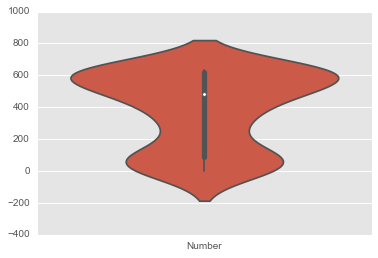

In [114]:
#Majority of the features have NULL values between 400 ,600 . Dropping the features that have more than 300 NULL values
sns.violinplot(data = df_null_num)

In [111]:
#There seems to be a lot of redeundant features  
df_feature = df_null_num[(df_null_num.Number < 300)]

In [112]:

df_feature

,Column,Number
0,Age,90.0
1,AttendedBootcamp,0.0
2,BootcampFinish,0.0
3,BootcampFullJobAfter,0.0
4,BootcampLoanYesNo,7.0
5,BootcampMonthsAgo,11.0
6,BootcampName,21.0
...,...,...
65,Part1StartTime,0.0
66,Part2EndTime,78.0


In [ ]:
# Checking each of the Attributes that are associated with the    FTE

In [89]:
df_FTE[[0]]

,Age
93,32.0
97,26.0
130,41.0
159,26.0
206,36.0
209,25.0
236,52.0
...,...
15412,24.0
15420,25.0


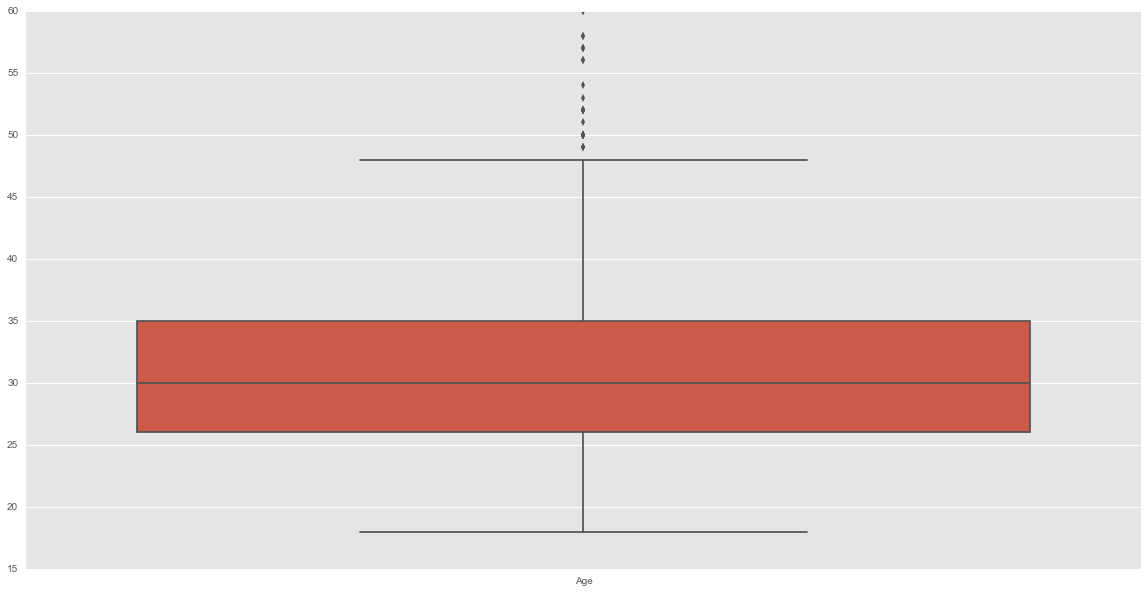

In [93]:
plt.figure(figsize=(20,10))

sns.boxplot(data = df_FTE[[0]])

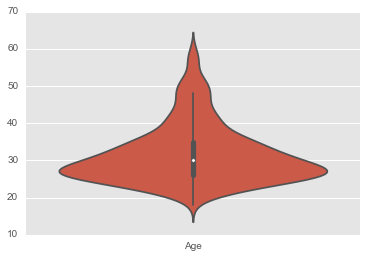

In [96]:
sns.violinplot(data = df_FTE[[0]])

- Median age of people who received FTE after a Boot camp is 30
- There are a few outliers in the data for peopek who have received the FTE after the median age.
- Majority of the People who are enrolling in the bootcamp are in the age 20-30


In [105]:
df_FTE[[1]].isnull().sum()

AttendedBootcamp    0
dtype: int64

In [117]:
df_FTE[['BootcampFinish']].describe()

,BootcampFinish
count,635.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


## FTE, Boot Camp and Loan

In [119]:
df_FTE['BootcampLoanYesNo'].value_counts()

0.0    409
1.0    219
Name: BootcampLoanYesNo, dtype: int64

- out of All the people who got full time employment after a Bootcamp 219 took loans

## Plotting relationship between FTE and Boot camp Job

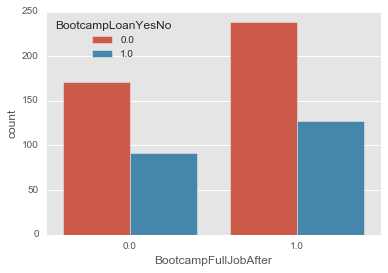

In [125]:
sns.countplot(data = df_FTE,x = 'BootcampFullJobAfter' , hue = 'BootcampLoanYesNo'   ,orient = 'h')

- Appears that in isolation , people who took the loan had more chances of getting into a job after the Boot Camp was over

In [ ]:
BootcampMonthsAgo

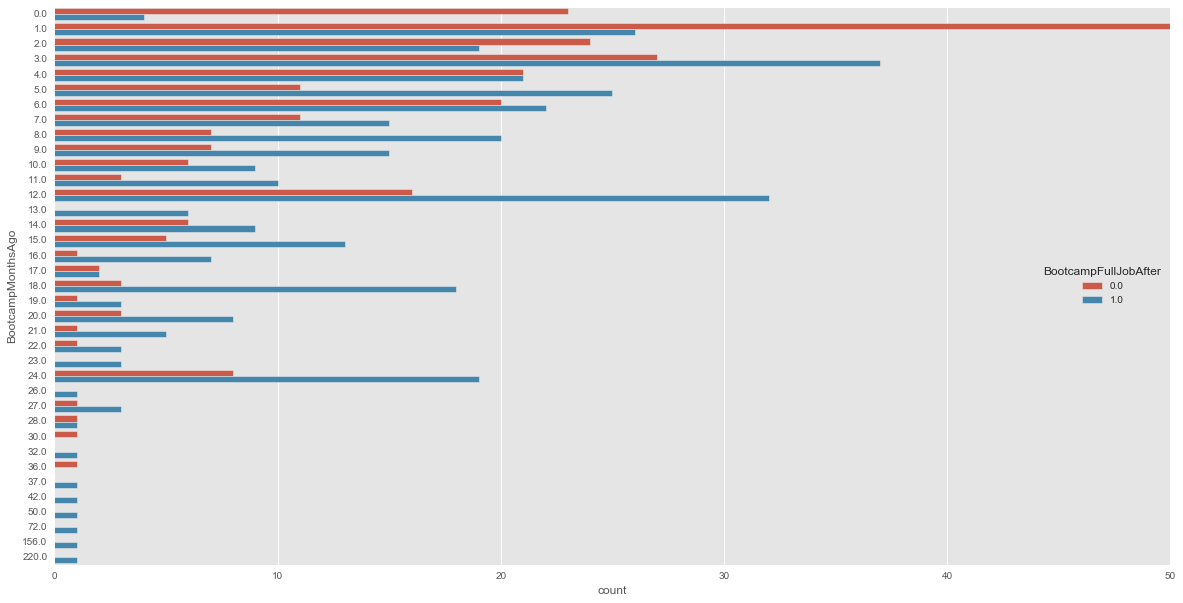

In [129]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_FTE , y = 'BootcampMonthsAgo' , hue = 'BootcampFullJobAfter'   ,orient = 'h')

- The chances of getting into a Full time job are none after 36 months of finishing a Boot camp

In [132]:
df_feature

,Column,Number
0,Age,90.0
1,AttendedBootcamp,0.0
2,BootcampFinish,0.0
3,BootcampFullJobAfter,0.0
4,BootcampLoanYesNo,7.0
5,BootcampMonthsAgo,11.0
6,BootcampName,21.0
...,...,...
65,Part1StartTime,0.0
66,Part2EndTime,78.0


In [133]:
df_FTE.columns

Index([u'Age', u'AttendedBootcamp', u'BootcampFinish', u'BootcampFullJobAfter',
       u'BootcampLoanYesNo', u'BootcampMonthsAgo', u'BootcampName',
       u'BootcampPostSalary', u'BootcampRecommend', u'ChildrenNumber',
       ...
       u'ResourceSoloLearn', u'ResourceStackOverflow', u'ResourceTreehouse',
       u'ResourceUdacity', u'ResourceUdemy', u'ResourceW3Schools',
       u'ResourceYouTube', u'SchoolDegree', u'SchoolMajor', u'StudentDebtOwe'],
      dtype='object', length=113)

In [135]:
df_FTE[['BootcampPostSalary']].describe()

,BootcampPostSalary
count,330.000000
mean,63740.506061
std,26347.200265
min,6000.000000
25%,50000.000000
50%,60000.000000
75%,77000.000000
max,200000.000000


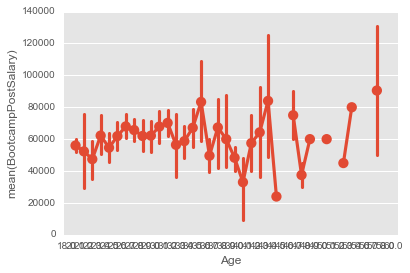

In [138]:
sns.pointplot(x = 'Age' , y = 'BootcampPostSalary' , data = df_FTE )